<a href="https://colab.research.google.com/github/drskprabhakar/Axial-Length-Prediction-ML-Regression-mode/blob/main/1000_fundus_laterality_images_CNN_16_layers_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split')

['train', 'val', 'test']

In [3]:
os.listdir('/content/drive/MyDrive/Normal Fundus Images/split/train')

['right eye fundus', 'left eye fundus']

In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/train',
                                          target_size=(64,64))
valimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/val',
                                          target_size=(64,64))
testimages = datagen.flow_from_directory('/content/drive/MyDrive/Normal Fundus Images/split/test',
                                          target_size=(64,64))

Found 892 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 113 images belonging to 2 classes.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


model = Sequential()

# Block 1
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 2
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 3
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 4
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Block 5
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Flatten
model.add(Flatten())

# Fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_78 (Conv2D)          (None, 64, 64, 16)        448       
                                                                 
 conv2d_79 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 32, 32, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_80 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_81 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                

In [29]:
model.fit(trainimages,
          batch_size=32,
          epochs=15,
          validation_data=valimages)

model.save('funduslaterality1000_model.keras')

Epoch 1/15
28/28 [==============================] - 22s 767ms/step - loss: 0.0789 - accuracy: 0.9686 - val_loss: 0.2737 - val_accuracy: 0.9273
Epoch 2/15
28/28 [==============================] - 23s 819ms/step - loss: 0.0968 - accuracy: 0.9731 - val_loss: 0.3379 - val_accuracy: 0.9545
Epoch 3/15
28/28 [==============================] - 21s 744ms/step - loss: 0.0933 - accuracy: 0.9641 - val_loss: 0.2531 - val_accuracy: 0.9455
Epoch 4/15
28/28 [==============================] - 24s 852ms/step - loss: 0.0816 - accuracy: 0.9765 - val_loss: 0.1917 - val_accuracy: 0.9636
Epoch 5/15
28/28 [==============================] - 22s 756ms/step - loss: 0.0614 - accuracy: 0.9776 - val_loss: 0.1634 - val_accuracy: 0.9545
Epoch 6/15
28/28 [==============================] - 23s 814ms/step - loss: 0.0571 - accuracy: 0.9809 - val_loss: 0.1928 - val_accuracy: 0.9455
Epoch 7/15
28/28 [==============================] - 22s 759ms/step - loss: 0.0480 - accuracy: 0.9854 - val_loss: 0.2126 - val_accuracy: 0.9545

In [ ]:
y_pred = model.predict(testimages)
y_pred

In [31]:
y_pred1 = np.argmax(y_pred, axis=1)
y_pred1

array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0])

In [19]:
y_true = testimages.classes
y_true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1], dtype=int32)

In [32]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[35, 22],
       [25, 31]])

In [33]:
print(metrics.classification_report(y_true, y_pred1))

              precision    recall  f1-score   support

           0       0.58      0.61      0.60        57
           1       0.58      0.55      0.57        56

    accuracy                           0.58       113
   macro avg       0.58      0.58      0.58       113
weighted avg       0.58      0.58      0.58       113



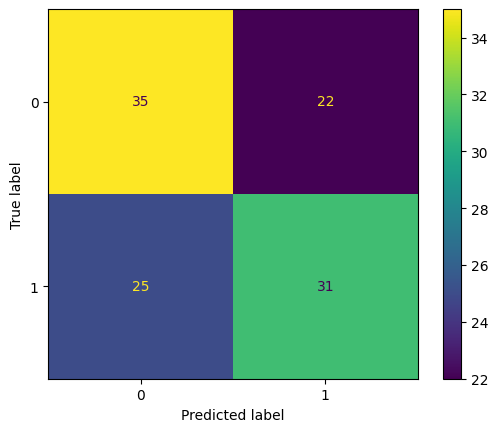

In [34]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

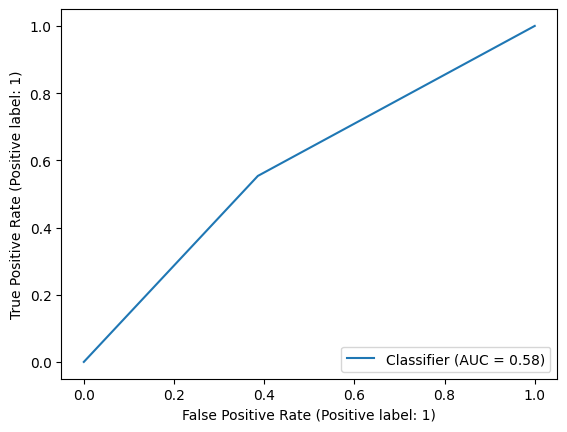

In [35]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred1)

1/1 [==============================] - 0s 319ms/step
Prediction: left eye fundus


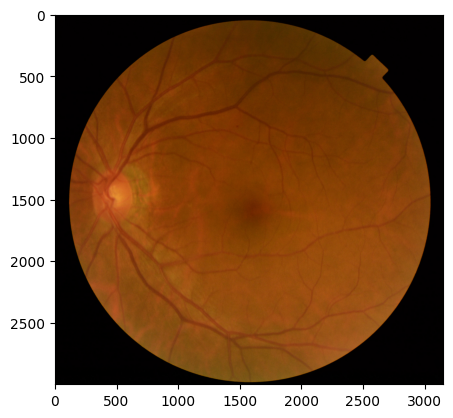

In [39]:
from keras.preprocessing import image
from keras.models import load_model

# Load the trained CNN model
model = load_model('/content/funduslaterality1000_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ['left eye fundus', 'right eye fundus'  ]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR fundus images/DR1/1ffa95bb-8d87-11e8-9daf-6045cb817f5b..JPG"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

import matplotlib.pyplot as plt
testimage = image.load_img('/content/drive/MyDrive/DR fundus images/DR1/1ffa95bb-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(testimage)

In [37]:
testimages.class_indices

{'left eye fundus': 0, 'right eye fundus': 1}